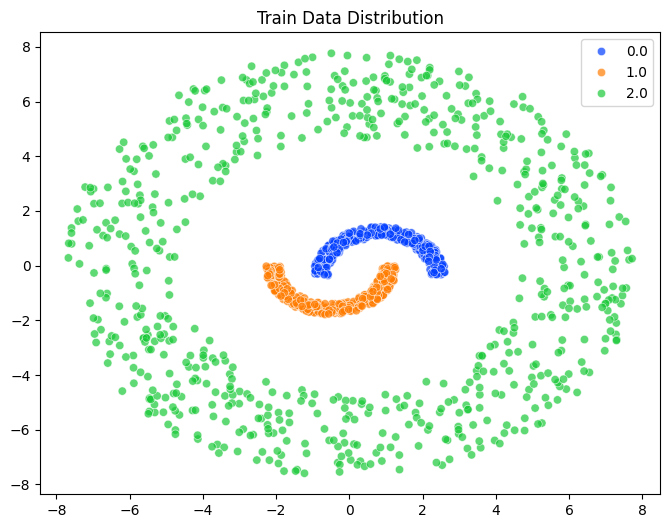

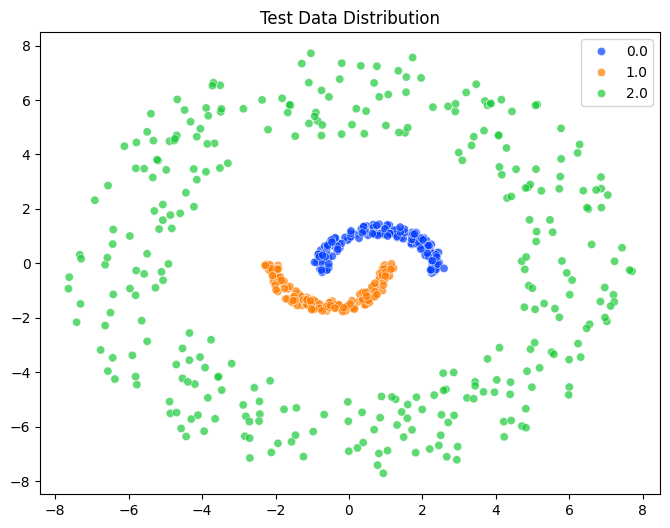

[0.5, 0.4851556367934911, 0.4710499550541641, 0.45768587994058324, 0.4450525841409959, 0.43312909245014386, 0.42188734943899137, 0.4112947222919879, 0.4013159704466406, 0.3919147451849061, 0.38305469436761835, 0.37470024741660113, 0.36681714892467504, 0.35937279961956003, 0.35233645310542855, 0.34567930711711425, 0.33937451953864306, 0.33339717234604266, 0.3277242008960099, 0.32233430145013797, 0.3172078263127351, 0.31232667328123387, 0.30767417409165937, 0.30323498504230173, 0.2989949818771853, 0.2949411602116227, 0.29106154221011743, 0.28734508982420426, 0.28378162462020406, 0.28036175404082314, 0.2770768038248676, 0.27391875623732115, 0.2708801937237363, 0.26795424758810416, 0.2651345512945912, 0.2624151980053625, 0.25979070198522747, 0.25725596352626956, 0.25480623707000954, 0.2524371022296391, 0.2501444374395536, 0.24792439598320243, 0.24577338417280412, 0.24368804147553408, 0.2416652224002872, 0.2397019799770362, 0.2377955506771752, 0.2359433406381287, 0.2341429130690068, 0.23239

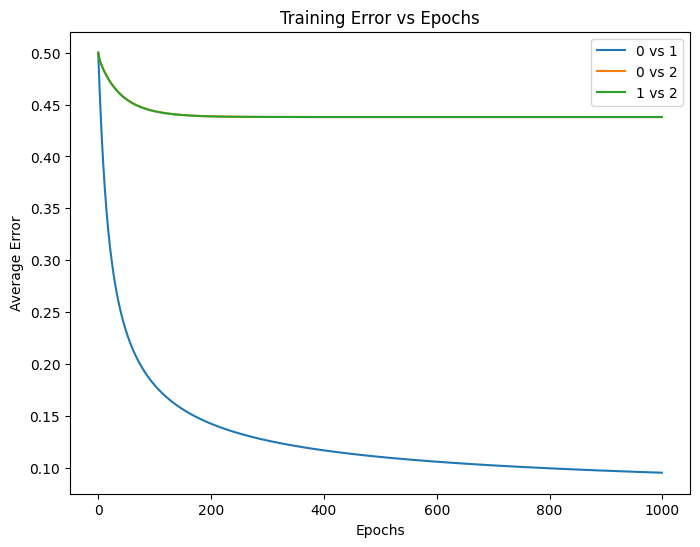

One-vs-One Perceptron Accuracy: 0.51


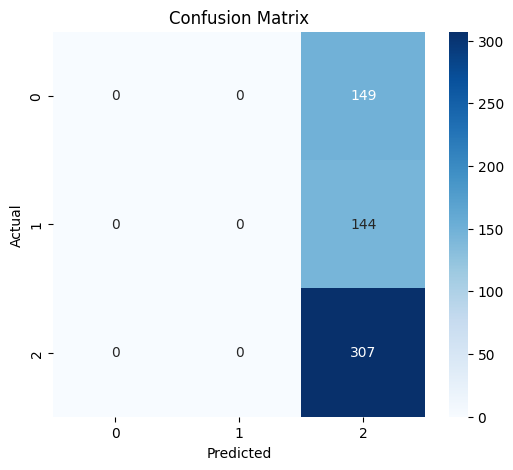


Inferences:
1. The dataset is not linearly separable, hence perceptron struggles with accuracy.
2. The confusion matrix shows misclassification between certain classes.
3. To improve accuracy, consider using an MLP or SVM.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

file_path = "dataset.txt"
df = pd.read_csv(file_path, delimiter=" ", header=None)
df = df.drop(df.columns[2], axis=1)

df['Class'] = np.concatenate((np.zeros(500), np.ones(500), np.full(1000, 2)))

df = df.sample(frac=1, random_state=42).reset_index(drop=True)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette="bright", alpha=0.7)
plt.title("Train Data Distribution")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette="bright", alpha=0.7)
plt.title("Test Data Distribution")
plt.show()

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_perceptron(X, y, learning_rate=0.1, epochs=1000):
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    W = np.zeros((X_bias.shape[1], 1))

    error_list = []
    for _ in range(epochs):
        z = np.dot(X_bias, W)
        y_pred = sigmoid(z)
        error = y_pred - y.reshape(-1, 1)
        gradient = np.dot(X_bias.T, error) / len(y)
        W -= learning_rate * gradient
        error_list.append(np.mean(np.abs(error)))

    return W, error_list

classifiers = {}
class_pairs = [(0, 1), (0, 2), (1, 2)]
error_logs = {}

for class1, class2 in class_pairs:
    subset = df[(df['Class'] == class1) | (df['Class'] == class2)]
    X_train_subset = subset.iloc[:, :-1].values
    y_train_subset = (subset['Class'].values == class2).astype(int)

    W, error_log = train_perceptron(X_train_subset, y_train_subset)
    classifiers[(class1, class2)] = W
    error_logs[(class1, class2)] = error_log

plt.figure(figsize=(8, 6))

for (class1, class2), error_log in error_logs.items():
    print(error_log)
    plt.plot(error_log, label=f"{class1} vs {class2}")
plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.title("Training Error vs Epochs")
plt.legend()
plt.show()


def predict_ovo(X):
    votes = np.zeros((X.shape[0], len(np.unique(y))))
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

    for (class1, class2), W in classifiers.items():
        pred = (sigmoid(np.dot(X_bias, W)) >= 0.5).astype(int)
        for i in range(len(pred)):
            votes[i, class1 if pred[i] == 0 else class2] += 1

    return np.argmax(votes, axis=1)


y_pred = predict_ovo(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"One-vs-One Perceptron Accuracy: {accuracy:.2f}")


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


print("\nInferences:")
print("1. The dataset is not linearly separable, hence perceptron struggles with accuracy.")
print("2. The confusion matrix shows misclassification between certain classes.")
print("3. To improve accuracy, consider using an MLP or SVM.")
